In [123]:
%matplotlib notebook
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
import sys
import math
import warnings
warnings.filterwarnings('ignore')

In [124]:
# def normalization(data):
#     from sklearn.preprocessing import MinMaxScaler
#     scaler = MinMaxScaler()
#     data = scaler.fit_transform(data)
#     return data

In [125]:
df = pd.read_csv("new_dtrain.csv", delimiter=",")
zeros = df[df['latitude'] == 0]
df = df[df['latitude'] != 0]
subset = list(df.columns.values)
subset = subset.remove('price')
data = df.drop_duplicates(subset = subset)
#print(len(data[data.price > 1000000000]))
data = data[data.price < 1000000000]
data = data[data.price < 800000000]
data = shuffle(data)
data.replace(-1, 0, inplace=True)
data.replace(' С ', '0', inplace=True)
data = data.reset_index(drop=True)

In [181]:
# data = log_feature(data)
#choosing data
X = data[['room_number', 'house_type', 'district',
       'built_time', 'appartments_floor', 'all_space', 'state', 'bathroom',
       'balcony', 'balcony_glassed', 'door', 'phone', 'ceiling', 'safety',
       'at_the_hotel', 'internet', 'furniture', 'parking', 'building_floors', 'map_complex', 'floor', 
          'trngl_first_point', 'trngl_second_point', 'trngl_third_point']]

#Geocode features = 'latitude','longitude',

# X_geo = data[['geocode_lat', 'geocode_long', 'trngl_first_point', 'trngl_second_point', 'trngl_third_point']]
y = data['price']
# x_columns = X.columns
# x_index = X.index
# X = normalization(X)
# X = pd.DataFrame(X, index=x_index, columns=x_columns)
# X = pd.concat([X, X_geo], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [182]:
model = KNeighborsRegressor(n_neighbors = 5, n_jobs=-1, p=1)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=5, p=1,
          weights='uniform')

In [183]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(model, X, y, cv=5)
# print(scores)

In [184]:
# var1 = 'longitude'
# var2 = 'latitude'

# data.plot.scatter(x=var1, y=var2, color = (0, 0, 0), s = 15, xlim = [76.70, 77.10], ylim = [43.10, 43.45])

In [185]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Mean absolute error: ", mean_absolute_error(model.predict(X_test), y_test))
print("Mean squared error: ", mean_squared_error(model.predict(X_test), y_test))
print("R2 score: ", model.score(X_test, y_test))

Mean absolute error:  3728201.39279
Mean squared error:  1.72951560936e+14
R2 score:  0.862717728474


In [186]:
#firstly you should get an interval (confidence_interval function)
def price_range(price, interval):
    #confidence interval should be Global variable!!!
    upper_price = price + interval
    lower_price = price - interval
    return upper_price, price, lower_price

In [187]:
#confidence interval for whole DataFrame
def confidence_interval(data):
    const = 3.62
    price = data['price']
    std = np.std(price)
    Z = std/(math.sqrt(len(price)))
    return (Z * const)

In [188]:
#Substract 7% from answer of the model
def percent_(price):
    x = (7*price)/100
    price -= x
    return price

#def find_neighbors(data, point):
    

In [189]:
data.head()

,Index,district,address,room_number,price,map_complex,house_type,built_time,appartments_floor,all_space,...,internet,furniture,floor,parking,latitude,longitude,building_floors,trngl_first_point,trngl_second_point,trngl_third_point
0,31765,2,мкр Самал-3,3,74800000,0.0,0,2004,10.0,141.2,...,0,0.0,6,0,43.225656,76.959154,17.0,10.613506,-15.459294,-0.864994
1,9652,3,Навои 208/1 — Рыскулбекова (Обручева),4,60600000,24.0,3,2014,3.0,130.0,...,0,0.0,6,0,43.205268,76.886365,16.0,19.931200,-6.141600,8.452700
2,30899,4,Жарокова 39/2 — Жамбыла,1,10300000,0.0,2,1979,5.0,31.0,...,3,0.5,0,0,43.245392,76.897459,5.0,14.809400,-11.263400,3.330900
3,28255,3,"мкр Орбита-3, Торайгырова 26",2,19000000,0.0,3,1999,6.0,70.0,...,0,0.0,0,0,43.199491,76.874283,9.0,21.717100,-4.355700,10.238600
4,17808,3,Джандосова 82 — Розыбакиева,1,14000000,0.0,4,1988,3.0,36.0,...,0,0.5,6,0,43.226430,76.890138,5.0,17.437700,-8.635100,5.959200


In [190]:
out = X_test[-1:]
y_test[-1:]

29177    18500000
Name: price, dtype: int64

In [191]:
out_pred = model.predict(out)
out_pred

array([ 20790800.])

In [192]:
error = abs(y_test[-1:] - out_pred)

In [193]:
error

29177    2290800.0
Name: price, dtype: float64

In [194]:
model.kneighbors(out)

(array([[  0.        ,  11.9136    ,  11.9136    ,  15.0344    ,
          15.75045082]]), array([[16536, 23271, 13060,  2419, 21284]]))

In [195]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [196]:
len(X.columns)

24

In [198]:
sfs = SFS(model, 
           k_features=len(X.columns),
           forward=True,
           floating=False,
           scoring='neg_mean_squared_error',
           cv=0)

sfs = sfs.fit(X.values, y)

print('\nSequential Forward Selection (k=25):')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)



Sequential Forward Selection (k=25):
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
CV Score:
-1.18287179927e+14


<IPython.core.display.Javascript object>


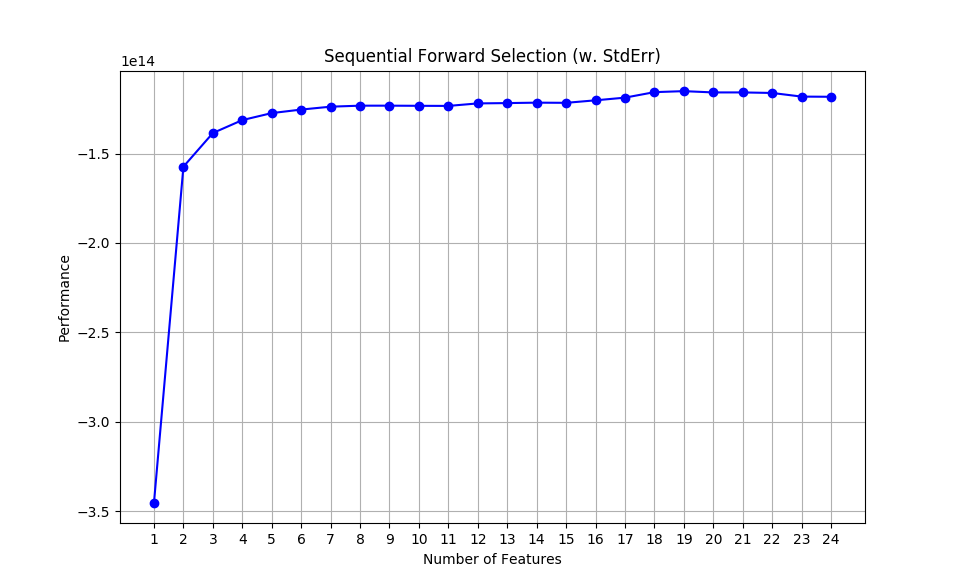

In [199]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()


Sequential Floating Forward Selection (k=25):
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
CV Score:
-1.18287179927e+14


<IPython.core.display.Javascript object>


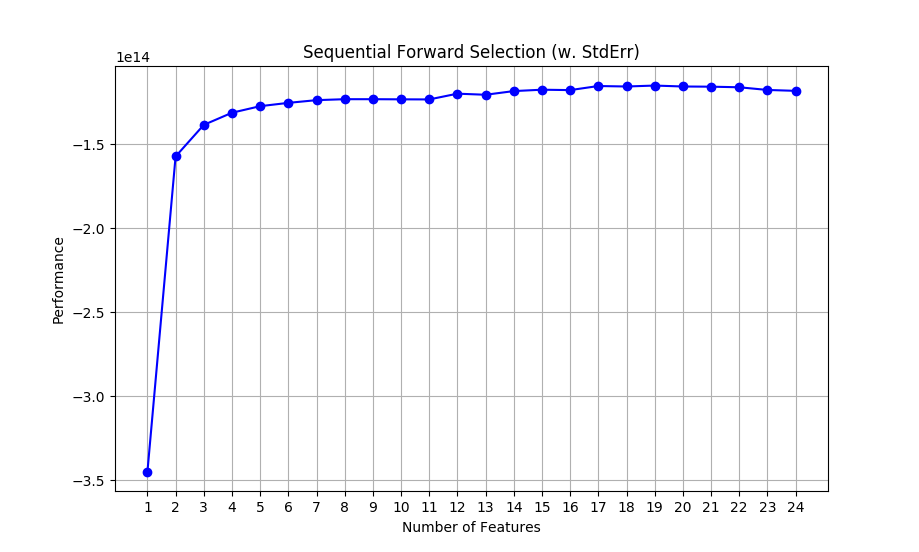

In [200]:
sffs = SFS(model, 
           k_features=len(X.columns),
           forward=True,
           floating=True,
           scoring='neg_mean_squared_error',
           cv=0)

sffs = sffs.fit(X.values, y)

print('\nSequential Floating Forward Selection (k=25):')
print(sffs.k_feature_idx_)
print('CV Score:')
print(sffs.k_score_)
fig = plot_sfs(sffs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()